In [1]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv("banco_dados/processed-data.csv")

In [83]:
df.head()

,SName,Lyric,Artist,Genres
0,Careless Whisper,feel unsure take hand lead dance floor music d...,Ivete Sangalo,Pop; Axé; Romântico
1,Could You Be Loved / Citação Musical do Rap: S...,let fool ya even try school ya oh got mind go ...,Ivete Sangalo,Pop; Axé; Romântico
2,Cruisin' (Part. Saulo),baby let cruise away confused way clear want g...,Ivete Sangalo,Pop; Axé; Romântico
3,Easy,know sound funny ca stand pain girl leaving to...,Ivete Sangalo,Pop; Axé; Romântico
4,For Your Babies (The Voice cover),got look one hoped lad face beaming smile got ...,Ivete Sangalo,Pop; Axé; Romântico


In [84]:
df.dropna(inplace=True)

In [85]:
#Depende aí do gênero musical que vai ser escolhido
genre = "Heavy Metal"

def get_target_number(element):
    return 1 if genre in element else 0

df['target'] = df['Genres'].apply(get_target_number)

In [86]:
positive = df[df['target'] == 1].sample(n=20000, random_state=1)
negative = df[df['target'] == 0].sample(n=20000, random_state=1)

In [87]:
df_train = pd.concat([positive, negative])

In [88]:
df_train.head()

,SName,Lyric,Artist,Genres,target
62633,In Power We Entrust The Love Advocated ( Dead ...,sail silver wing storm fortune love may bring ...,Within Temptation,Rock; Gótico; Heavy Metal,1
75086,Circle of Hands,circle hand cold spirit plan searching land en...,Uriah Heep,Hard Rock; Rock; Heavy Metal,1
91326,M.o.m.,against mass begging revenge wimp prefer stayi...,Dream Evil,Heavy Metal; Gospel/Religioso; Axé,1
93154,Never Get Me Down,korzus never get walking direction homeless fa...,Korzus,Heavy Metal,1
91338,The 7th Day,day search finally thousand cave everywhere go...,Dream Evil,Heavy Metal; Gospel/Religioso; Axé,1


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
X_tfidf_vectorizer = tfidf_vectorizer.fit_transform(df_train['Lyric']).toarray()

feature_names = tfidf_vectorizer.get_feature_names_out()
print("Numero de features: {}".format(len(feature_names)))

Numero de features: 18632


In [71]:
from sklearn.model_selection import train_test_split

y = df_train['target']
x = X_tfidf_vectorizer

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics

score = metrics.accuracy_score(y_test, y_pred)
print(f"Score: {score}")

precision = metrics.precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = metrics.recall_score(y_test, y_pred)
print(f"Recall: {recall}") 

Score: 0.7975833333333333
Precision: 0.8098298020145884
Recall: 0.7775554443888611


In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

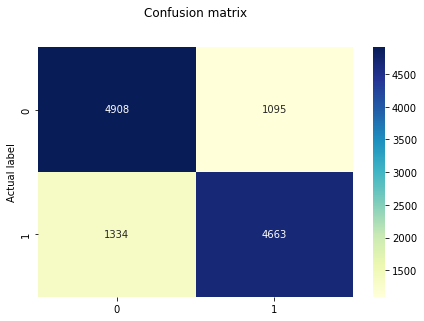

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label')
plt.show()

In [16]:
df_train.drop(['SName', 'Artist', 'Genres'], axis=1, inplace=True)
df_train.head()

,Lyric,target
62633,sail silver wing storm fortune love may bring ...,1
75086,circle hand cold spirit plan searching land en...,1
91326,against mass begging revenge wimp prefer stayi...,1
93154,korzus never get walking direction homeless fa...,1
91338,day search finally thousand cave everywhere go...,1


In [17]:
df_train.to_csv("banco_dados/final-data.csv", index=False)

In [81]:
import pickle

filename = "tfidf_vectorizer.sav"
pickle.dump(tfidf_vectorizer, open(filename, "wb"))

filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, y_test)
print(result)

0.7975833333333333
